# Exploring the Indian Economy with the SHRUG

This is part readme part replication package for the lecture on `SHRUG: Using data to understand the Indian Economy`. See more [here](https://www.devdatalab.org/shrug_download/). Go through this repo to recreate the results and graphs in the presentation/jupyter notebook. 

### Structure 

- All the data here comes from the publicly available SHRUG (Socioeconomic High-resolution Rural-Urban Geographic Platform for India). Subset of the Data for this lecture can be downloaded from [here](https://drive.google.com/file/d/1TqAJyfFxircvKkcZIYb2U0INAqAIyvIW/view?usp=sharing)
    - Some datasets have been processed beforehand in the intrests of time.
        1. `~/data/indian_economy_lecture/ec_dist.dta`
        2. `~/data/indian_economy_lecture/ec_subdist.dta`
        3. `~/data/indian_economy_lecture/ec_india_summary.dta`
    - Dataset cleaning code: `~/indian_economy/prep_data.do`
       - Cleaning code is in stata just in case anyone prefers that coding language and is disappointed that we did everything else in Python. 
       - The first graph on employment across sectors from ec can also be generated within the `prep_data.do` code itself. 
- The main analysis exists in `~/indian_economy/indian_economy_pres.ipynb`
       
###  Getting python to run locally

The ipython notebook/html can be run locally on your desktop in either an IDE like Anaconda or through the command line with miniconda. 
- I'd recommend Anaconda if you're very new to Python. Documentation [here](https://docs.anaconda.com/_downloads/3613d324acc0a4b3c203fd79c71a2b45/Anaconda-Starter-Guide.pdf)
    - And you're set to run Jupyter notebooks (in python) from Anaconda locally. 
- At the very least you'd need to install the packages pandas, geopandas, matplotlib and numpy. We use one custom function called make_heatmap() to create geographic maps of ec/pc data in `~/indian_economy/tools.py`. Whichever directory you save the tools.py function in, make sure to tell python to search for this function in there using the lines:
``` python
sys.path.insert(0, '/path/to/folder/with/tools.py')
from tools import make_heatmap
```

### Running the code
Once you have python/jupyter notebooks setup on your desktop you should be able to run this notebook or code locally. 

### What you'll find in the SHRUG

- Population and Economic Censuses
- Nightlights 1994-2013
- Forest Cover 2000-2019
- Open Shapefiles for India till the village/town level
- PMGSY (Pradhan Mantri Gram Sadak Yojana)
- SECC 2012
- And lots more



### We will use in this hour

- Population and Economic Censuses

### To answer the following questions:

#### 1. Broad Economic Trends
- How did Liberalisation/IT boom in 1991 affect employment in services and manufacturing?
    - Is there a regional pattern in employment here?    
        - Note: we don't say anything causal here, just a description of life after 1991 if you went into the labor market
  

#### 2. Demographic composition of the country
- How many villages in the country have no SCs/Dalits, how are they distributed.
    - Is there a regional pattern here?
    


# Housekeeping Code

In [1]:
#Load packages
import pandas as pd
import geopandas as gpd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#Import make heatmap function
import sys

# Put your local path here.
sys.path.insert(0, '/Users/kjha/ddl/kjha/indian_economy')
from tools import make_heatmap

#Set home path 
#Everyone can set their own path here, it's the folder where all your data will live
home = "/Users/kjha/ddl/kjha/data/indian_economy_lecture_data"

# 1. Broad Economic Trends

In [5]:
# read data
df_ec_all = pd.read_stata(f"{home}/ec_india_summary.dta")
plt.style.use('seaborn')

/var/folders/0s/btwgbwgx2n1flh_yp55mfq300000gn/T/ipykernel_37608/2175891508.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [6]:
df_ec_all

,id,year,emp_manuf_ec,emp_services_ec,emp_all_ec
0,india,1990,13.958873,27.460117,42.395199
1,india,1998,18.213452,42.246378,61.688028
2,india,2005,21.153813,55.646197,78.476851
3,india,2013,27.846894,77.067064,107.509812


[Text(0, 0.5, 'Employment (Millions)'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Employment Over Time')]

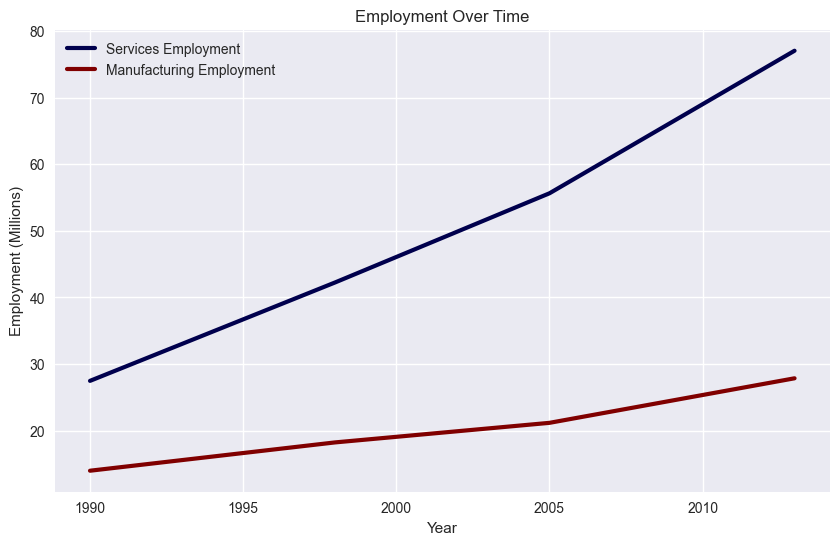

In [7]:
fig_all, ax_all = plt.subplots(figsize = [10,6])
df_ec_all.plot.line(ax = ax_all, x = 'year', y = [ 'emp_services_ec', 'emp_manuf_ec'], 
                    cmap = 'seismic', linewidth = '3')

ax_all.legend(['Services Employment', 'Manufacturing Employment'])
ax_all.set(ylabel = "Employment (Millions)", xlabel = "Year",
          title = "Employment Over Time")

### Employment in Services has more than doubled. 

#### Greater divergence in services and manufacturing employment over time

- But how does is this employment distributed across the country?

##### Regional Patterns in Service Employment

In [8]:
# read data
df_ec = pd.read_stata(f"{home}/ec_dist.dta")

In [9]:
# read in shapefile
shp_dist = gpd.read_file(f"{home}/polygons/district.shp")
states = gpd.read_file(f"{home}/polygons/state.shp")

In [10]:
# merge in shapefile to ec district data
df_ec = df_ec.merge(
    shp_dist,
    left_on = ["pc11_state_id", "pc11_district_id"],
    right_on = ["pc11_s_id", "pc11_d_id"],
    how = "right"
)

In [11]:
# Turn to geopandas shapefile to map
df_ec = gpd.GeoDataFrame(df_ec)

In [12]:
#Convert number of jobs into percentiles (no need to worry about outliers)
df_ec["ec90_emp_services"] = df_ec.ec90_emp_services.rank(pct = True)
df_ec["ec98_emp_services"] = df_ec.ec98_emp_services.rank(pct = True)
df_ec["ec05_emp_services"] = df_ec.ec05_emp_services.rank(pct = True)
df_ec["ec13_emp_services"] = df_ec.ec13_emp_services.rank(pct = True)

In [13]:
fig_98 = make_heatmap(df_ec,  states, "ec98_emp_services", cbar_label = "EC 98 Employment",
             cmap = "seismic_r", norm_min = np.min(df_ec["ec98_emp_services"]), 
             norm_max = np.max(df_ec["ec98_emp_services"]))
fig_98.savefig(f'{home}/output/ec_98')


<Figure size 800x550 with 0 Axes>

In [14]:
fig_13 = make_heatmap(df_ec,  states, "ec13_emp_services", cbar_label = "EC 13 Employment",
             cmap = "seismic_r", norm_min = np.min(df_ec["ec13_emp_services"]), 
             norm_max = np.max(df_ec["ec13_emp_services"]))
fig_13.savefig(f'{home}/output/ec_13')

<Figure size 800x550 with 0 Axes>

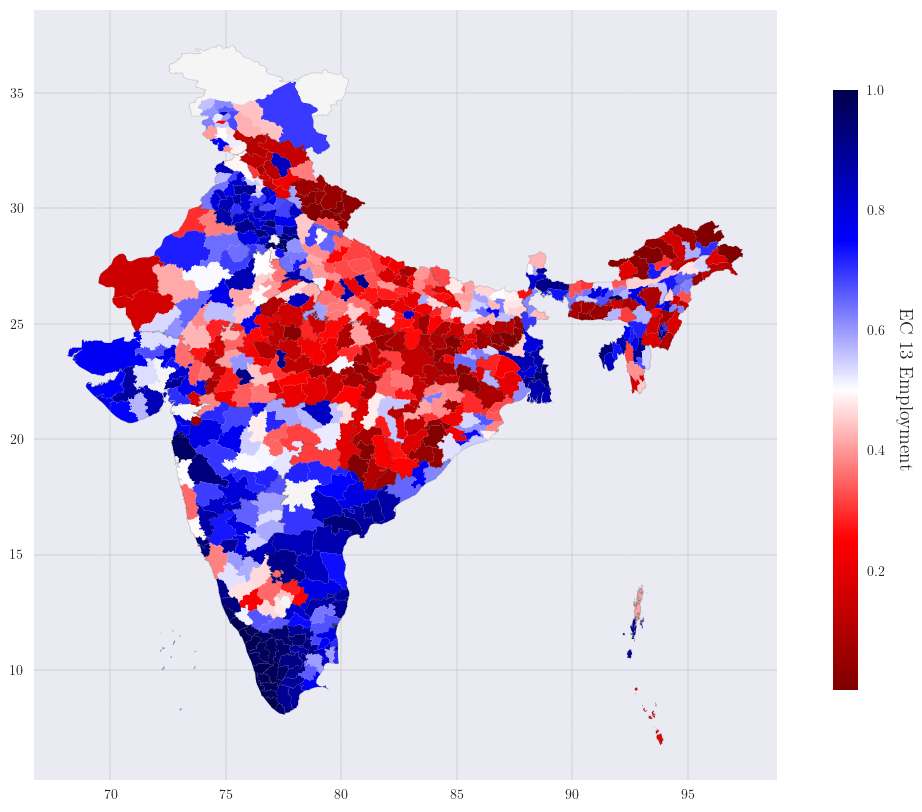

In [15]:
fig_13

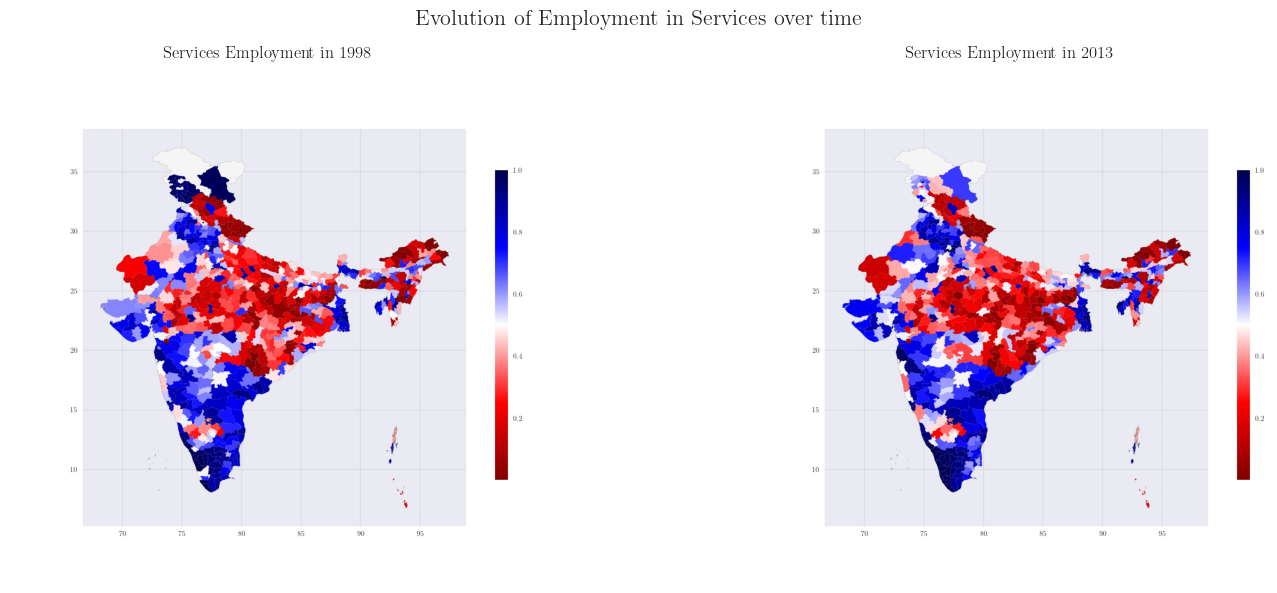

In [16]:
# import matplotlib.pyplot as plt
img1 = plt.imread(f'{home}/output/ec_98.png')
img2 = plt.imread(f'{home}/output/ec_13.png')

NUM_ROWS = 1
IMGs_IN_ROW = 2
f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(16,6))

ax[0].imshow(img1)
ax[1].imshow(img2)


ax[0].set_title('Services Employment in 1998')
ax[1].set_title('Services Employment in 2013')

#remove ticks
ax[0].tick_params(axis  = 'both', bottom= False, left  = False,
                             labelbottom = False, labelleft   = False)
ax[1].tick_params(axis  = 'both', bottom= False, left  = False,
                             labelbottom = False, labelleft   = False)

#turn off axis box
ax[0].axis('off')
ax[1].axis('off')

title = 'Evolution of Employment in Services over time'
f.suptitle(title, fontsize=16)
plt.tight_layout()
plt.show()


# 2. Demographic Composition of the Country

## Data Cleaning (python)

In [17]:
# read data
df_pc = pd.read_stata(f'{home}/ecpc/dta/shrug_pc11.dta')
pc11_key = pd.read_stata(f'{home}/ecpc/keys/shrug_pc11r_key.dta')
shp_village = gpd.read_file(f"{home}/polygons/village.shp")

In [18]:
# keep the sc variables and shrid 
df_pc = df_pc[['shrid', 'pc11_pca_p_sc', 'pc11_pca_tot_p', 'pc11_pca_tot_p_r' ]]

 ### How Many villages with no SC's? 

In [19]:
df_pc['pc11_pca_p_sc'].value_counts()[0]

139371

In [20]:
len(df_pc['shrid'])

590874

#### ~20% or 1/5th of all Villages have no Dalits

But how are these villages distributed? Let's graph out a map to see

In [21]:
#merge data to pc11 identifiers
df_pc = df_pc.merge(pc11_key,
                   left_on = ['shrid'],
                   right_on = ['shrid'],
                   how = 'inner' )
df_pc.columns.values

array(['shrid', 'pc11_pca_p_sc', 'pc11_pca_tot_p', 'pc11_pca_tot_p_r',
       'pc11_state_id', 'pc11_district_id', 'pc11_subdistrict_id',
       'pc11_village_id'], dtype=object)

In [22]:
#merge data to shape file
df_pc = df_pc.merge(shp_village,
                    left_on = ['pc11_state_id', 'pc11_district_id', 
                              'pc11_subdistrict_id','pc11_village_id'],
                    right_on = ['pc11_s_id', 'pc11_d_id', 'pc11_sd_id', 'pc11_tv_id'],
                    how = 'right')


In [23]:
# turn to geopandas object
df_pc = gpd.GeoDataFrame(df_pc)

In [24]:
df_pc['sc_pop_rank'] = df_pc.pc11_pca_p_sc.rank(pct= True)

In [25]:
village_sc_fig = make_heatmap(df_pc,  states, "sc_pop_rank", cbar_label = "Village SC Pop",
             cmap = "Blues", norm_min = np.min(df_pc["sc_pop_rank"]), 
             norm_max = np.max(df_pc["sc_pop_rank"]))

<Figure size 800x550 with 0 Axes>

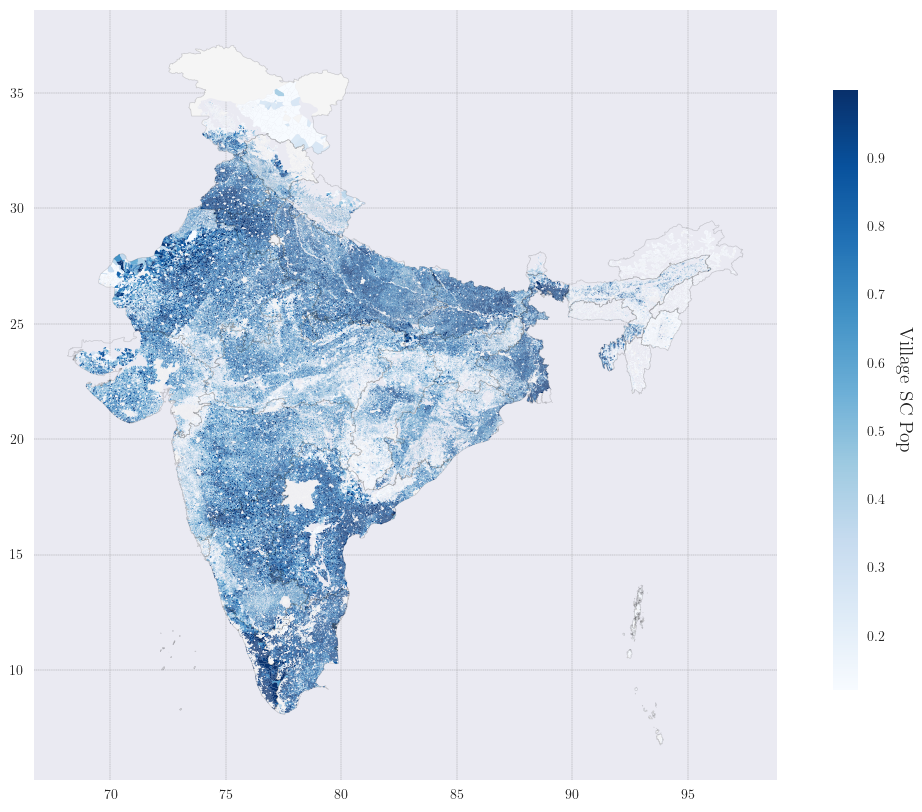

In [26]:
village_sc_fig